# Fake News Detection Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import warnings      #to avoid warnings
warnings.filterwarnings('ignore')


Import data

In [2]:
dt=pd.read_csv('True.csv')
df=pd.read_csv('Fake.csv')

DATA VISUALIZATION AND PREPROCESSING

In [3]:
dt.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
num = dt.shape
print(num)

(21417, 4)


In [5]:
#Counting by Subjects 
for key,count in dt.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{dt.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


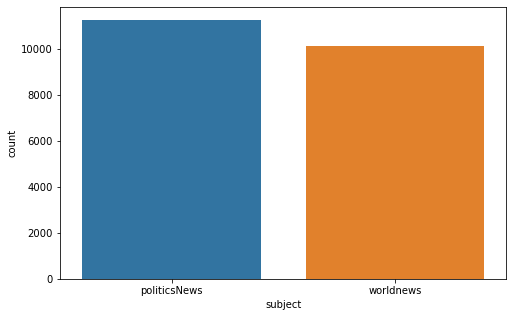

In [6]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=dt)
plt.show()

In [7]:
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
num = df.shape
print(num)

(23481, 4)


In [9]:
#Counting by Subjects 
for key,count in df.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{df.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


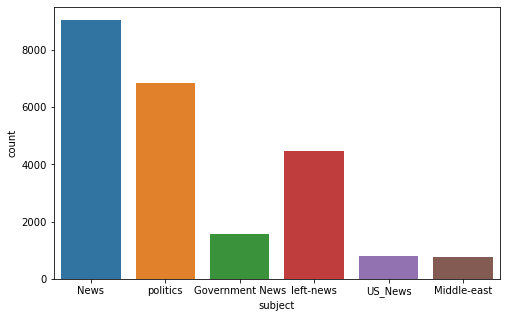

In [10]:
# showing in barchart
plt.figure(figsize=(8,5))
sns.countplot("subject", data=df)
plt.show()

In [11]:
#Setting up a target variable and combining both the real and fake news datasets
dt['category'] = "true"
df['category'] = "fake"

In [12]:
#Merging the 2 datasets
dp = pd.concat([dt,df])
dp.shape

(44898, 5)

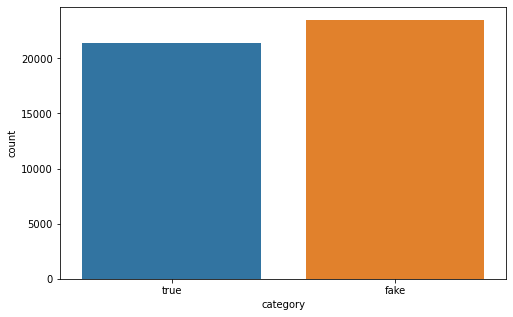

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(dp.category)
plt.show()

In [14]:
dp.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [15]:
dp.tail()

,title,text,subject,date,category
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",fake


In [16]:
# shuffle the data
from sklearn.utils import shuffle
dp= shuffle(dp)

In [17]:
dp.head()

,title,text,subject,date,category
2227,Merkel sees no military solution to U.S. dispu...,BERLIN (Reuters) - There is no military soluti...,politicsNews,"August 11, 2017",true
5007,CNN Host Utterly EMBARRASSES Trump Lackey Who...,What just happened on CNN would be sad if it w...,News,"August 17, 2016",fake
20294,"Trump, Malaysian PM discuss trade deals, Boein...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"September 12, 2017",true
22303,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,US_News,"December 28, 2016",fake
21154,Brazilian prosecutors want Lula absolved in co...,SAO PAULO (Reuters) - Former Brazilian Preside...,worldnews,"September 1, 2017",true


In [18]:
#Removing the data
dp.drop(["date"],axis=1,inplace=True)
dp.head()

,title,text,subject,category
2227,Merkel sees no military solution to U.S. dispu...,BERLIN (Reuters) - There is no military soluti...,politicsNews,true
5007,CNN Host Utterly EMBARRASSES Trump Lackey Who...,What just happened on CNN would be sad if it w...,News,fake
20294,"Trump, Malaysian PM discuss trade deals, Boein...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,true
22303,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,US_News,fake
21154,Brazilian prosecutors want Lula absolved in co...,SAO PAULO (Reuters) - Former Brazilian Preside...,worldnews,true


In [19]:
#Removing the title
dp.drop(["title"],axis=1,inplace=True)

In [20]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 2227 to 15257
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      44898 non-null  object
 1   subject   44898 non-null  object
 2   category  44898 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [21]:
dp.isna().sum()

text        0
subject     0
category    0
dtype: int64

In [22]:
dp.count()

text        44898
subject     44898
category    44898
dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'News'),
 Text(2, 0, 'worldnews'),
 Text(3, 0, 'US_News'),
 Text(4, 0, 'left-news'),
 Text(5, 0, 'politics'),
 Text(6, 0, 'Government News'),
 Text(7, 0, 'Middle-east')]

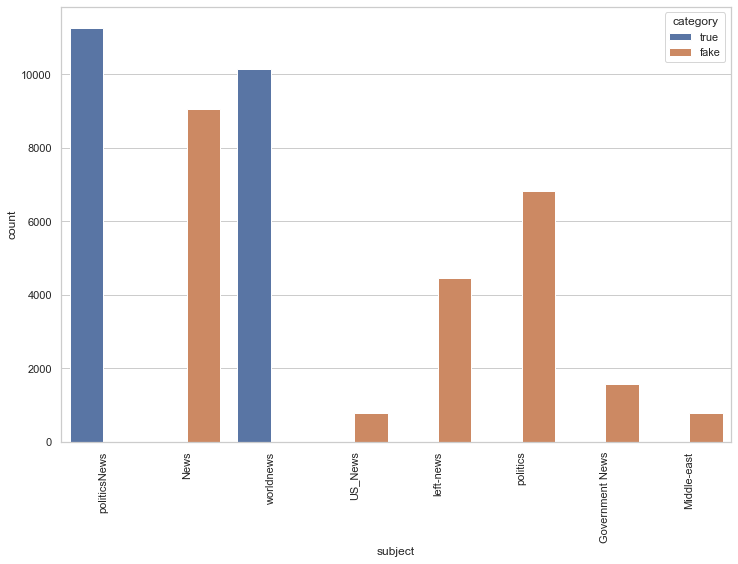

In [23]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1)
chart = sns.countplot(x = "subject", hue = "category" , data = dp)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [24]:
dp.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
# how many stop words we have
print(len(dp))

44898


In [28]:
# removing punctuation and irrelevant words
def process_text(text):
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return nopunc
    
dp['text']=dp['text'].apply(process_text)


In [29]:
dp.head()

,text,subject,category
2227,BERLIN Reuters There is no military solution ...,politicsNews,true
5007,What just happened on CNN would be sad if it w...,News,fake
20294,WASHINGTON Reuters US President Donald Trump ...,worldnews,true
22303,Funny how secrets travel I d start to believe...,US_News,fake
21154,SAO PAULO Reuters Former Brazilian President ...,worldnews,true


In [30]:
dp['text'] = dp['text'].apply(lambda x: x.lower())

In [31]:
len(dp)

44898

In [32]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

dp['text'] = dp['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [33]:
dp.head()

,text,subject,category
2227,berlin reuters military solution united states...,politicsNews,true
5007,happened cnn would sad gosh darn funnyit would...,News,fake
20294,washington reuters us president donald trump s...,worldnews,true
22303,funny secrets travel start believe bleed lyric...,US_News,fake
21154,sao paulo reuters former brazilian president l...,worldnews,true


In [34]:
!pip install wordcloud

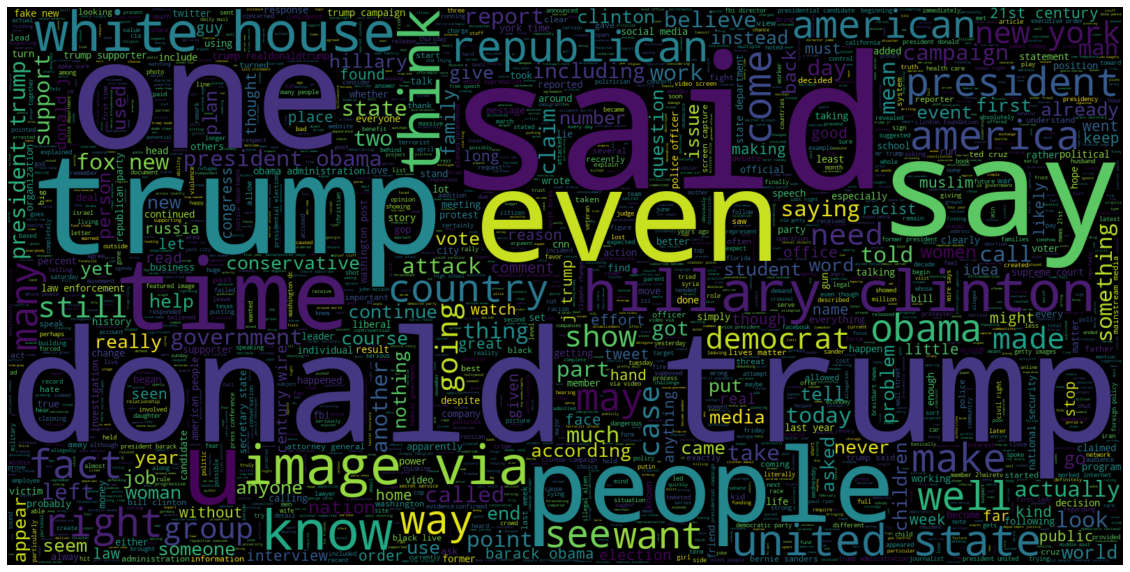

In [35]:
# word cloud for fake news
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(dp[dp.category == "fake"].text))
plt.axis('off')
plt.imshow(wc , interpolation = 'bilinear')

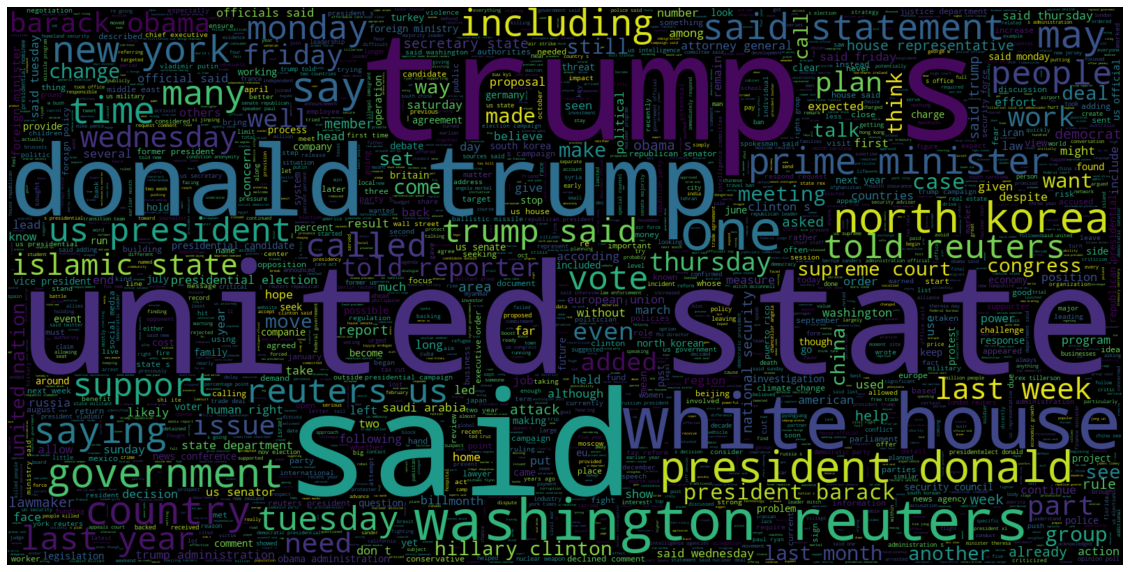

In [36]:
plt.figure(figsize = (20,20)) # Text that is true
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(dp[dp.category == "true"].text))
plt.axis('off')
plt.imshow(wc , interpolation = 'bilinear')

In [37]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

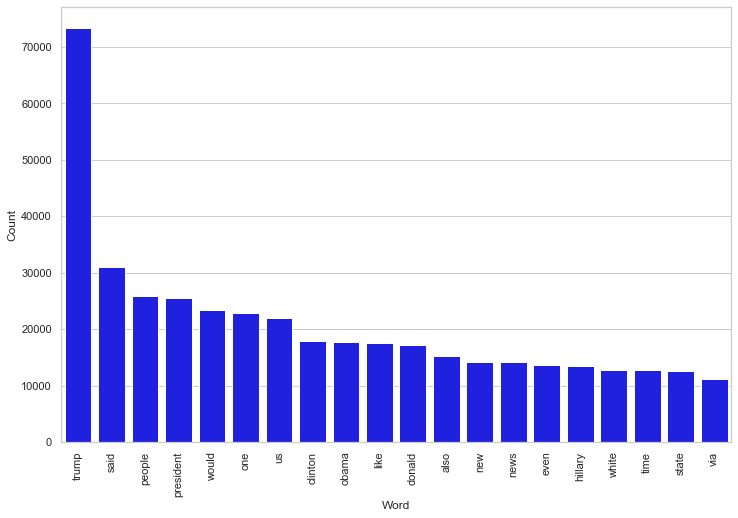

In [38]:
# Most frequent words in fake news
counter(dp[dp['category'] == "fake"], "text", 20)

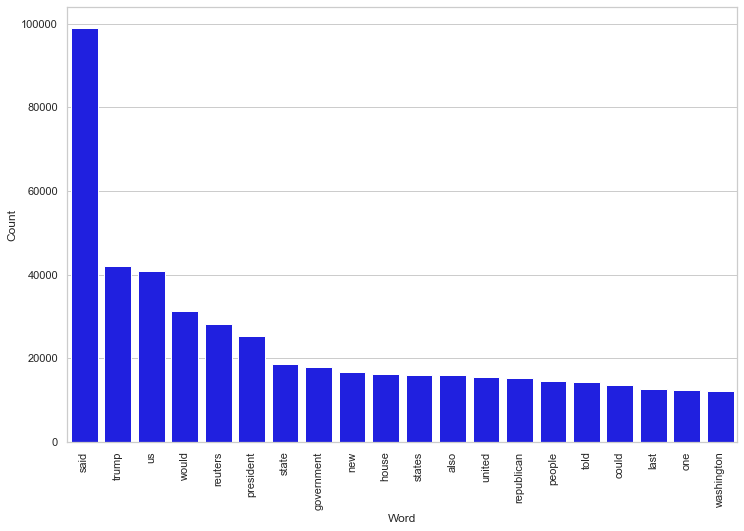

In [39]:
# Most frequent words in real news
counter(dp[dp["category"] == "true"], "text", 20)

# Appling NLP Techniques

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


In [41]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(dp['text'], dp.category, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35918,)
(8980,)
(35918,)
(8980,)


In [42]:
X_train.head()

2235     washington reuters four us senate republicans ...
22697    21st century wire says 21wire predicted new ye...
17410    baghdad reuters around 400000 children still d...
6968     awesome many levels hard know beginafghanistan...
4639     washington reuters us president donald trump s...
Name: text, dtype: object

In [43]:
X_test.head()

7482     istanbul reuters turkish foreign minister mevl...
18510    berlin reuters three germany main parties rais...
6803     dropping republican presidential race dr ben c...
6940     beijing reuters us presidentelect donald trump...
17567    luxembourg reuters european commission preside...
Name: text, dtype: object

In [44]:
y_train.head()

2235     true
22697    fake
17410    true
6968     fake
4639     true
Name: category, dtype: object

In [45]:
y_test.head()

7482     true
18510    true
6803     fake
6940     true
17567    true
Name: category, dtype: object

In [46]:
#before we can train an algorithm to classify fake news labels, we need to extract features from it. it means
#reducing the mass of unstructured data into some uniform set of attributes that an algorithm can understand. 
#for fake news detection,it could be word counts (bag of words).

#we will start with simple bag of words techinque building the count and Tfidf vectors


count_vectorizer= CountVectorizer (stop_words='english')
count_train= count_vectorizer.fit_transform(X_train)
#fit and transform the training data
#learn the vocabulary dictionary and return term-document matrix

In [47]:
print(count_vectorizer)

CountVectorizer(stop_words='english')


In [48]:
print(count_train)

  (0, 194191)	1
  (0, 154187)	2
  (0, 162638)	1
  (0, 152950)	1
  (0, 127354)	11
  (0, 150737)	2
  (0, 171339)	6
  (0, 189780)	1
  (0, 184859)	2
  (0, 14450)	1
  (0, 180922)	1
  (0, 30687)	1
  (0, 164558)	3
  (0, 191124)	6
  (0, 159189)	4
  (0, 47838)	1
  (0, 159940)	1
  (0, 148220)	1
  (0, 47471)	1
  (0, 73330)	1
  (0, 46097)	1
  (0, 188681)	5
  (0, 159187)	1
  (0, 143125)	2
  (0, 122677)	1
  :	:
  (35917, 9952)	1
  (35917, 93358)	1
  (35917, 56756)	2
  (35917, 168637)	1
  (35917, 168919)	4
  (35917, 92633)	1
  (35917, 98714)	1
  (35917, 148435)	1
  (35917, 144495)	1
  (35917, 42407)	1
  (35917, 191023)	1
  (35917, 15086)	1
  (35917, 124277)	1
  (35917, 45655)	1
  (35917, 103988)	1
  (35917, 105108)	1
  (35917, 98979)	1
  (35917, 47307)	1
  (35917, 37616)	1
  (35917, 154813)	1
  (35917, 134851)	1
  (35917, 99011)	1
  (35917, 168922)	1
  (35917, 18863)	1
  (35917, 36717)	1


In [49]:
def get_countvectorizer_stats():
    #vocab size
    print(count_train.shape)
    #print (count_vectorizer.vocabulary_)
get_countvectorizer_stats()

(35918, 202099)


In [50]:
#transform the test set
count_test = count_vectorizer.transform(X_test)

In [51]:
#This removes words which appear in more than 70% of the articles
tfidf_vectorizer= TfidfVectorizer(stop_words='english',max_df=0.7)

In [52]:
#fit and transform the training data
tfidf_train= tfidf_vectorizer.fit_transform(X_train)

In [53]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

In [54]:
from sklearn.pipeline import Pipeline

In [55]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('tfidf', tfidf_vectorizer),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])


# Fitting the model 1
model1 = pipe.fit(X_train, y_train)

# Accuracy
prediction_d= model1.predict(X_test)
f1 =f1_score(y_test, prediction_d, pos_label='true')

print('f1 score:',f1)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_d)*100,2)))

f1 score: 0.9944932630345635
accuracy: 99.48%


In [56]:
print(metrics.classification_report(y_test, prediction_d))

              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      4707
        true       1.00      0.99      0.99      4273

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


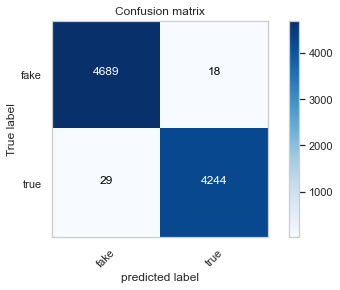

In [57]:
cm = metrics.confusion_matrix(y_test, prediction_d)
plot_confusion_matrix(cm, classes=['fake', 'true'])

In [58]:
from sklearn.linear_model import LogisticRegression

# Vectorizing and applying TF-IDF
pipe = Pipeline([('liner', tfidf_vectorizer),
                 ('modell', LogisticRegression())])
# Fitting the model
model2= pipe.fit(X_train, y_train)

# Accuracy
prediction = model2.predict(X_test)
f1 =f1_score(y_test, prediction, pos_label='true')
print(f1)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

0.9823618736128957
accuracy: 98.32%


In [59]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.99      0.98      0.98      4707
        true       0.98      0.98      0.98      4273

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



Confusion matrix, without normalization


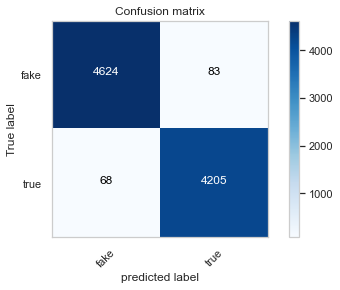

In [60]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['fake', 'true'])

In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier
pipe_p = Pipeline([('liner',tfidf_vectorizer), 
                 ('model', PassiveAggressiveClassifier(max_iter=50))])
# Fitting the model
model3= pipe_p.fit(X_train, y_train)

# Accuracy
prediction_p= model3.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_p)*100,2)))

accuracy: 99.37%


Confusion matrix, without normalization


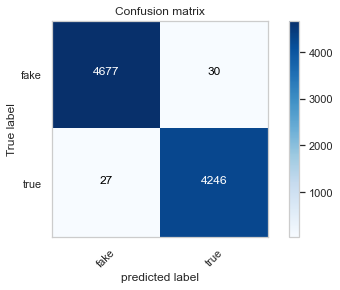

In [62]:
cm = metrics.confusion_matrix(y_test, prediction_p,)
plot_confusion_matrix(cm, classes=['fake', 'true'])

In [63]:
print(metrics.classification_report(y_test, prediction_p))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4707
        true       0.99      0.99      0.99      4273

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [64]:
from sklearn.ensemble import RandomForestClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('tfidf', tfidf_vectorizer),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
# Fitting the model
model4 = pipe.fit(X_train, y_train)

# Accuracy
prediction2 = model4.predict(X_test)
f1 =f1_score(y_test, prediction2, pos_label='true')
print(f1)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction2)*100,2)))

0.9867820797754123
accuracy: 98.74%


In [65]:
print(metrics.classification_report(y_test, prediction2))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4707
        true       0.99      0.99      0.99      4273

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


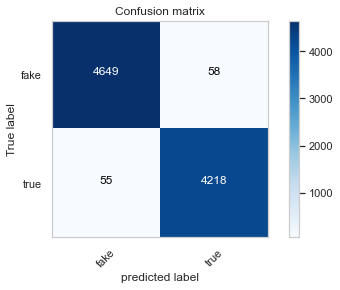

In [66]:
cm = metrics.confusion_matrix(y_test, prediction2,)
plot_confusion_matrix(cm, classes=['fake', 'true'])

In [67]:
import pickle
filename = "radom.pickle"

# save model4
pickle.dump(model4, open(filename, "wb"))

In [68]:
#doc_new = ['obama is running for president in 2016']

var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))


#function to run for prediction
def detecting_fake_news(var):    
#retrieving the best model for prediction call
    load_model = pickle.load(open('radom.pickle', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))


if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text you want to verify: fwfxgfgdsz
You entered: fwfxgfgdsz
The given statement is  fake
The truth probability score is  0.0020331322245175517
